## Kline/Candlestick Data
https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-data

In [17]:
import datetime
import pandas as pd
import numpy as np

from binance.spot import Spot

def get_klines(client, symbol, interval, start_time=None, end_time=None, limit=1000):
    klines = []
    time = None
    while True:
        response = client.klines(symbol, interval, startTime=start_time, endTime=end_time, limit=limit)
        klines.extend(response)
        if len(response) > 0:
            time = response[-1][6]
        else:
            break
        if len(response) < limit:
            break
        # 更新下一次请求的起始时间
        start_time = response[-1][0] + 1  # 下一个周期的起始时间
        # time.sleep(0.05)  # 为了避免频繁请求，等待一秒钟
    
    # 列名
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote', 'number_of_trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Unused field']

    # 创建DataFrame
    klines = pd.DataFrame(klines, columns=columns)

    # 将open_time和close_time列转换为datetime格式
    klines['open_time'] = pd.to_datetime(klines['open_time'], unit='ms')
    klines['close_time'] = pd.to_datetime(klines['close_time'], unit='ms')

    # 将字符串转换为数值（需要数值列）
    numeric_cols = ['open', 'high', 'low', 'close', 'volume',]
    klines[numeric_cols] = klines[numeric_cols].apply(pd.to_numeric, errors='coerce')

    return klines, time


client = Spot()
pair = "BTCUSDT"

current_utc_time = datetime.datetime.utcnow()
two_weeks_ago = current_utc_time - datetime.timedelta(weeks=2)

current_unix_timestamp_sec = int(current_utc_time.timestamp())
two_weeks_ago_unix_timestamp_sec = int(two_weeks_ago.timestamp())

klines, time = get_klines(client, pair, "1m", two_weeks_ago_unix_timestamp_sec * 1000, current_unix_timestamp_sec * 1000)

klines

,open_time,open,high,low,close,volume,close_time,quote,number_of_trades,Taker buy base asset volume,Taker buy quote asset volume,Unused field
0,2024-03-20 21:09:00,67065.02,67075.20,67017.05,67017.05,29.40069,2024-03-20 21:09:59.999,1971089.50257500,998,9.51509000,637900.92622690,0
1,2024-03-20 21:10:00,67017.05,67084.21,67003.96,67084.20,22.90265,2024-03-20 21:10:59.999,1535691.43092420,1158,15.25475000,1022798.88904830,0
2,2024-03-20 21:11:00,67084.21,67100.00,67023.44,67023.63,44.36071,2024-03-20 21:11:59.999,2974579.10872710,1604,23.64504000,1585337.73303690,0
3,2024-03-20 21:12:00,67023.63,67059.77,66989.10,67059.76,57.79874,2024-03-20 21:12:59.999,3873077.11537630,1862,35.23084000,2360766.93883070,0
4,2024-03-20 21:13:00,67059.76,67186.98,67056.38,67181.09,76.92814,2024-03-20 21:13:59.999,5163245.52455150,2318,54.59331000,3663832.97945930,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20155,2024-04-03 21:04:00,65563.99,65607.27,65556.72,65583.15,14.75785,2024-04-03 21:04:59.999,967856.71521860,1338,7.73841000,507530.99616920,0
20156,2024-04-03 21:05:00,65583.15,65583.15,65510.00,65517.99,31.49514,2024-04-03 21:05:59.999,2063984.01521150,1552,9.61125000,629783.33417810,0
20157,2024-04-03 21:06:00,65517.98,65566.46,65517.98,65556.00,17.78749,2024-04-03 21:06:59.999,1165721.84956930,1639,9.92587000,650468.81782090,0
20158,2024-04-03 21:07:00,65556.00,65564.00,65541.45,65552.00,14.93427,2024-04-03 21:07:59.999,978966.00897330,1014,8.32373000,545631.76777190,0


### Save / Load Data

In [18]:
# klines.to_csv("./data/kline_data")

In [ ]:
klines = pd.read_csv("./data/kline_data")

### Kline

/tmp/ipykernel_1699670/777698976.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open_time'] = df['open_time'].apply(mdates.date2num)


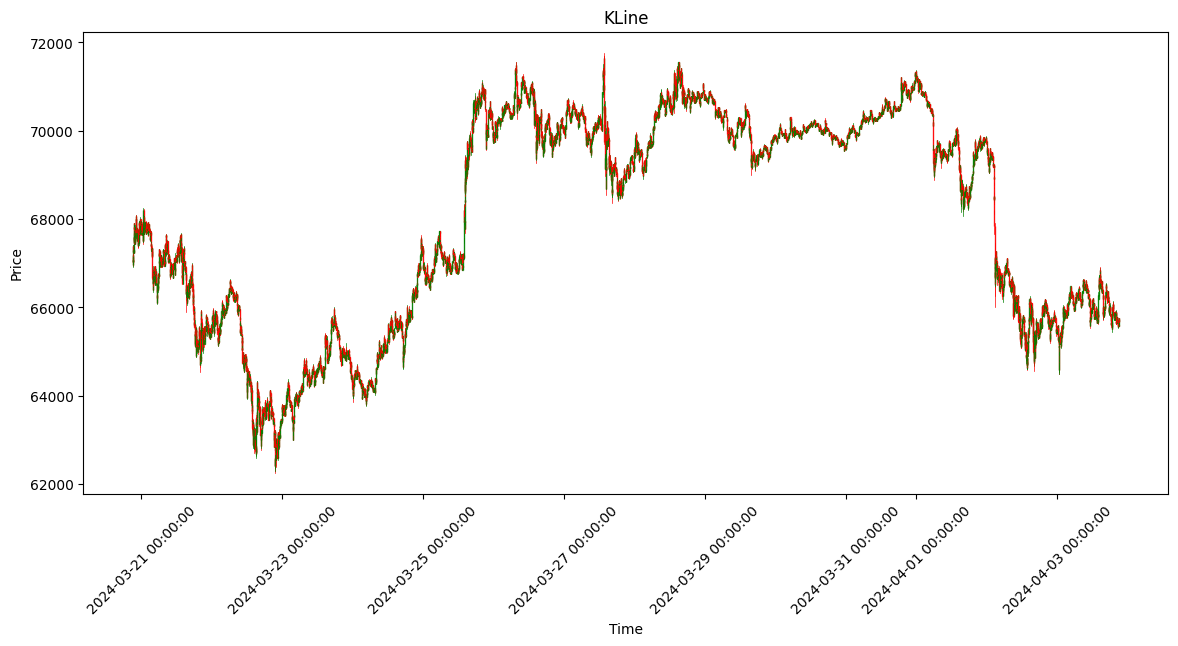

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates


df = klines

# # 将时间列转换为datetime格式
# df['open_time'] = pd.to_datetime(df['open_time'])

# 重新排列列的顺序以满足mplfinance的要求
df = df[['open_time', 'open', 'high', 'low', 'close']]

# 设置画图区域
fig, ax = plt.subplots(figsize=(14, 6))

# 将时间转换为matplotlib能够识别的格式
df['open_time'] = df['open_time'].apply(mdates.date2num)
ohlc = df[['open_time', 'open', 'high', 'low', 'close']].values

# 画K线图
candlestick_ohlc(ax, ohlc, width=0.0005, colorup='g', colordown='r', alpha=0.8)

# 设置x轴为时间格式
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# 旋转x轴上的日期标签
plt.xticks(rotation=45)

# 设置图形标题和标签
plt.title('KLine')
plt.xlabel('Time')
plt.ylabel('Price')

# 显示图形
plt.show()


### Close Price

Summary statistics for the Close column:
count    20160.000000
mean     68037.892416
std       2380.772839
min      62406.280000
25%      65851.202500
50%      69167.560000
75%      70149.990000
max      71658.000000
Name: close, dtype: float64



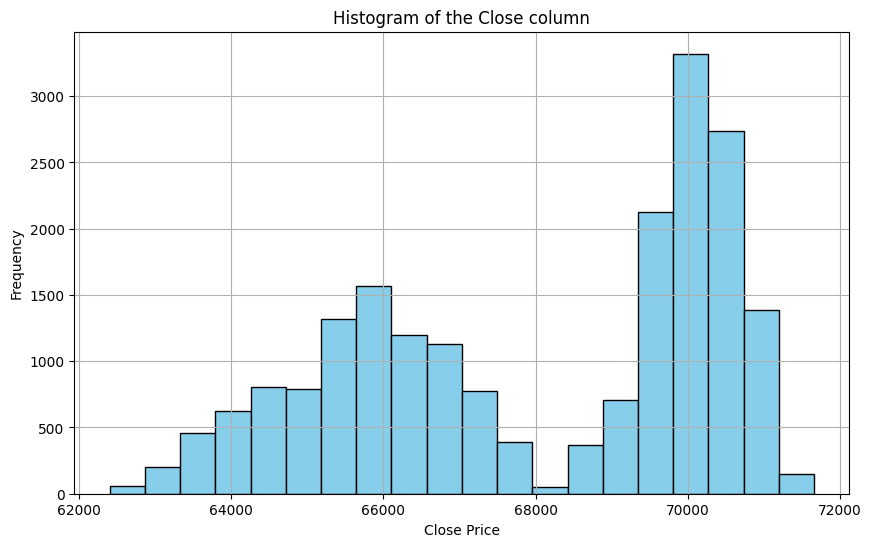

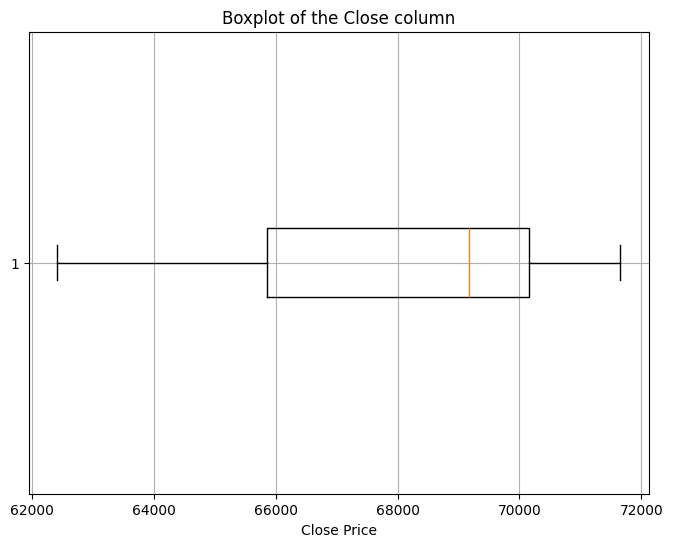

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume kline is your DataFrame

# Descriptive statistics for the close column
close_stats = klines['close'].describe()
print("Summary statistics for the Close column:")
print(close_stats)
print()

# Histogram of the close column
plt.figure(figsize=(10, 6))
plt.hist(klines['close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of the Close column')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of the close column
plt.figure(figsize=(8, 6))
plt.boxplot(klines['close'], vert=False)
plt.title('Boxplot of the Close column')
plt.xlabel('Close Price')
plt.grid(True)
plt.show()


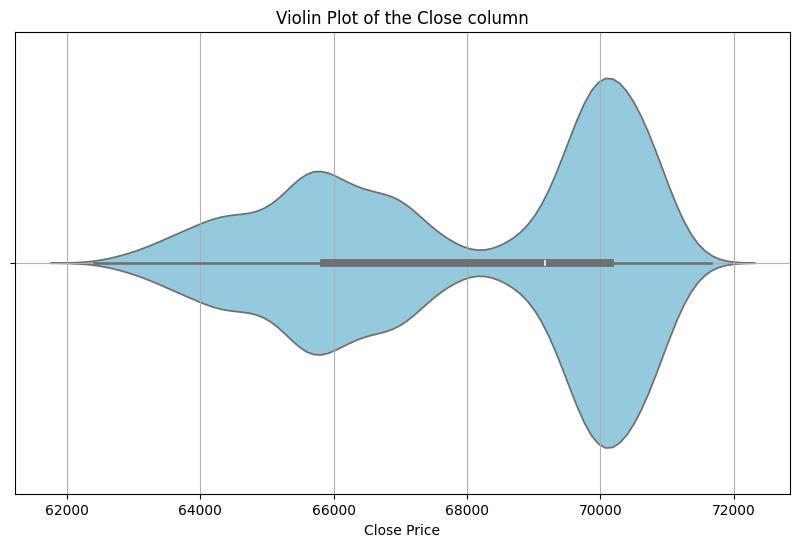

In [24]:
import seaborn as sns

# Violin plot of the close column
plt.figure(figsize=(10, 6))
sns.violinplot(x=klines['close'], color='skyblue')
plt.title('Violin Plot of the Close column')
plt.xlabel('Close Price')
plt.grid(True)
plt.show()


### Close Price Differences

Summary statistics for the Close differences:
count    20159.000000
mean        -0.073634
std         52.496132
min       -823.440000
25%        -25.140000
50%         -0.010000
75%         24.800000
max        493.580000
Name: close, dtype: float64



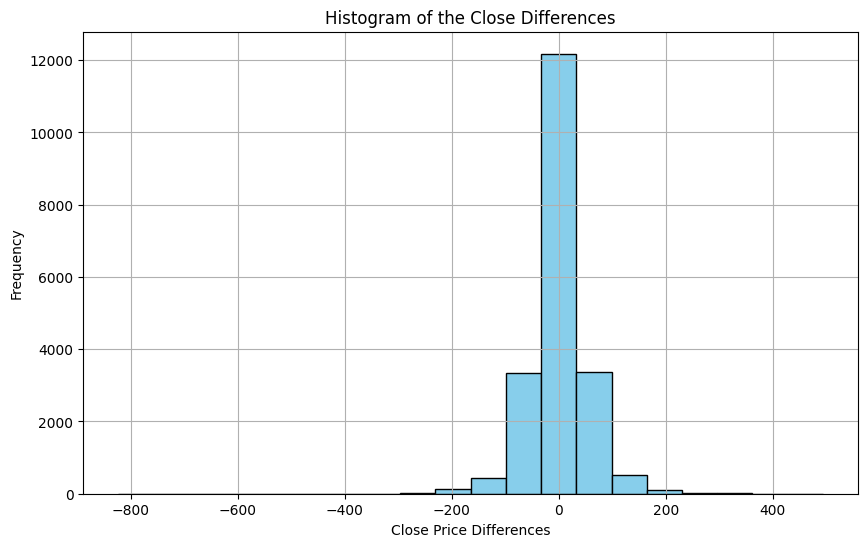

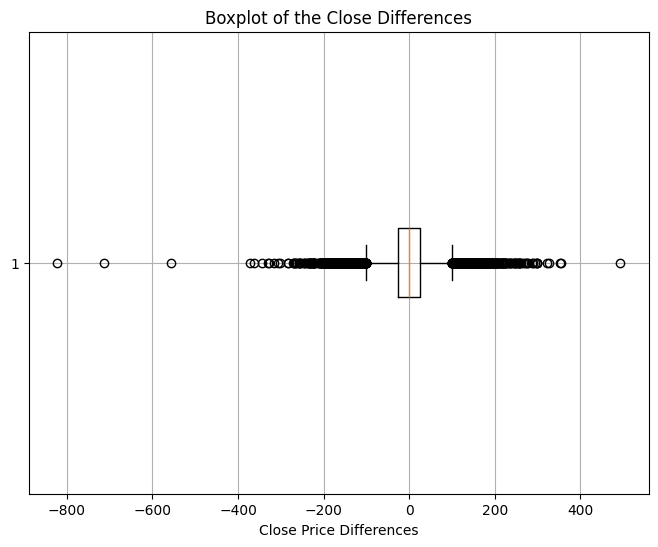

In [25]:
# Calculate the differences (changes) in the close column
close_diff = klines['close'].diff()

# Drop the first row since it will have a NaN value due to the diff calculation
close_diff = close_diff.dropna()

# Descriptive statistics for the close differences
close_diff_stats = close_diff.describe()
print("Summary statistics for the Close differences:")
print(close_diff_stats)
print()

# Histogram of the close differences
plt.figure(figsize=(10, 6))
plt.hist(close_diff, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of the Close Differences')
plt.xlabel('Close Price Differences')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of the close differences
plt.figure(figsize=(8, 6))
plt.boxplot(close_diff, vert=False)
plt.title('Boxplot of the Close Differences')
plt.xlabel('Close Price Differences')
plt.grid(True)
plt.show()


/tmp/ipykernel_1699670/2703572259.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(close_diff, color='skyblue')


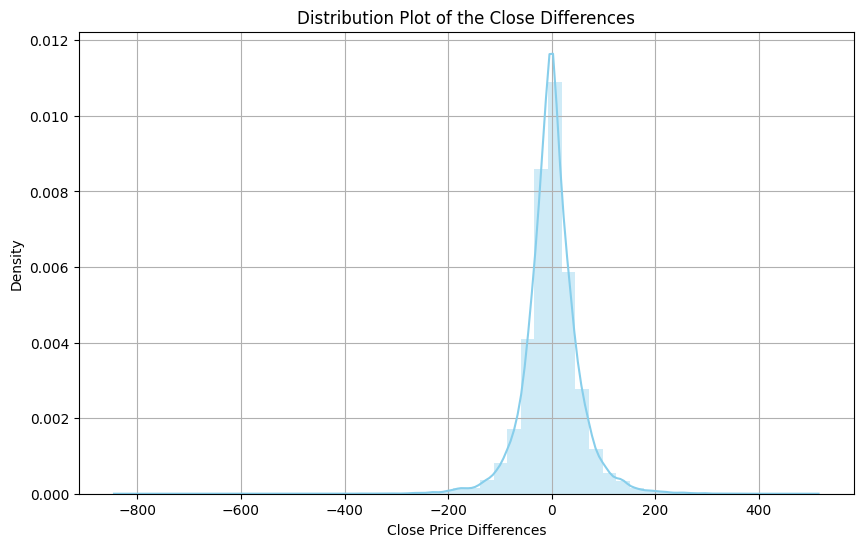

In [27]:
# Distribution plot of the close differences
plt.figure(figsize=(10, 6))
sns.distplot(close_diff, color='skyblue')
plt.title('Distribution Plot of the Close Differences')
plt.xlabel('Close Price Differences')
plt.ylabel('Density')
plt.grid(True)

plt.show()